In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# creating customers data dataframe  
# All csv files should be in the root folder 
customersdf = pd.read_csv('_data/customers.csv')
customersdf=customersdf.drop(['Unnamed: 0'],axis=1)
customersdf.dropna(subset=["id_number"], axis=0, inplace=True)
customersdf['province'] =customersdf['province'].str.lower()
customersdf['customer_type'] =customersdf['customer_type'].str.lower()
customersdf.dropna(subset=["province"], axis=0, inplace=True)

In [3]:
#Preview Customers Dataset 
#customersdf['id_number']=customersdf['id_number'].astype('string')
customersdf=customersdf.sort_values('province',key=lambda x:x.str.len()) #check provinces entered correctly
customersdf['id_number'] =customersdf['id_number'].abs()
customersdf.head()

,id_number,province,customer_type
0,3816952758161034129,eastern,normal
129336,370380942793283140,western,normal
129337,4350385051407530737,western,vip
129338,8806539073855002419,western,basic
129339,6769496816752039155,eastern,vip


In [4]:
#check missing data
missing_data = customersdf.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

id_number
False    232554
Name: id_number, dtype: int64

province
False    232554
Name: province, dtype: int64

customer_type
False    232554
Name: customer_type, dtype: int64



In [5]:
customersdf['customer_type'].describe()

count     232554
unique         3
top       normal
freq       77845
Name: customer_type, dtype: object

In [6]:
#check for Null Values in columns 
for (columnName, columnData) in customersdf.iteritems():
     print( customersdf[columnName].isnull().values.any())

False
False
False


In [7]:
#CHECK DATA TYPES
customersdf.dtypes

id_number         int64
province         object
customer_type    object
dtype: object

In [8]:
#Remove negative numbers from  ID numbers
customersdf.head()

,id_number,province,customer_type
0,3816952758161034129,eastern,normal
129336,370380942793283140,western,normal
129337,4350385051407530737,western,vip
129338,8806539073855002419,western,basic
129339,6769496816752039155,eastern,vip


In [9]:
#PREVIEW DF tail
customersdf.tail()

,id_number,province,customer_type
136512,5023728354683356681,northern,normal
136511,3389963762872813310,northern,normal
48191,6648295342421697917,northern,basic
48177,2781943850887394308,southern,basic
155092,788554627966667473,northern,vip


In [10]:
#GROUP BY CUSTOMER TYPE 
customersType=customersdf.groupby(['province','customer_type'])['id_number'].count()
customersType = pd.DataFrame(customersType)
#customersType = customersType.reset_index(drop=False)
customersType

id_number
province customer_type           
eastern  basic              19513
         normal             19597
         vip                19290
northern basic              19320
         normal             19495
         vip                19519
southern basic              19169
         normal             19273
         vip                19403
western  basic              19180
         normal             19480
         vip                19315

In [11]:
#CHECK for duplicate entries 
#boolean = customersdf['Unnamed: 0'].duplicated().any()
boolean = customersdf.duplicated(subset=['id_number']).any()
print(boolean, end='\n\n') # FALSE no duplicate entries 
len(customersdf['id_number']) 

False



232554

In [12]:
#1. EVALUATE FOR MISSING DATA check for null values in datafame 
customersdfNull = customersdf[customersdf['id_number'].isnull()]
customersdfNull

#devicesRegionNull.shape
#missing_data = customersdf.isnull()
#missing_data.tail()
#no missing Data 

,id_number,province,customer_type


In [13]:
# Drop the Unamed :0 axis inconsistent entries 
#newCustomersDF=customersdf.drop(['Unnamed: 0'],axis=1)
Regionsdf=customersdf['province'].value_counts(ascending=False)
Regionsdf

eastern     58400
northern    58334
western     57975
southern    57845
Name: province, dtype: int64

In [14]:
#GROUP CUSTOMERS  and compare 
zdf = customersdf.groupby('province')['id_number'].count() 
zdf = pd.DataFrame(zdf)
zdf = zdf.reset_index(drop=False)
#neworiginRegion.rename(columns = {'calls':'No. of Calls'}, inplace = True)
zdf.head()
#neworiginRegion.style.set_caption("Calls Made per customer  Region")

,province,id_number
0,eastern,58400
1,northern,58334
2,southern,57845
3,western,57975


In [15]:
#No. of Customers per customer region
Regionsdf=pd.DataFrame(Regionsdf)
Regionsdf=Regionsdf.reset_index(drop=False)
Regionsdf.rename(columns = {'index':'Region','province':'No. of Customers'}, inplace = True)
Regionsdf
Regionsdf.style.set_caption("No. of Customers Per Customer Region")
Regionsdf.head()

,Region,No. of Customers
0,eastern,58400
1,northern,58334
2,western,57975
3,southern,57845


In [16]:
Regionsdf['No. of Customers'].sum()

232554

Text(0.5, 1.0, 'Customers per Customer Region')

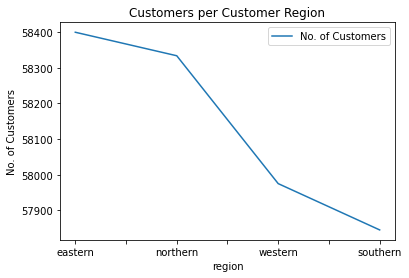

In [17]:
#PLOT 
Regionsdf.plot(kind='line',x='Region',y='No. of Customers')
plt.xlabel('region')
plt.ylabel('No. of Customers')
plt.title('Customers per Customer Region')

In [18]:
#creating devices data dataframe 
devicesDf = pd.read_csv('_data/device.csv')
devicesDf['owner']=devicesDf['owner'].abs()
devicesDf['phone_number']=devicesDf['phone_number'].str[-9:]
devicesDf.rename(columns = {'owner':'id_number'}, inplace = True)
devicesDf=devicesDf.drop(['Unnamed: 0'],axis=1)
devicesDf.tail()

,phone_number,id_number
324640,060139054,8514553214591424979
324641,084119560,5528271616769697361
324642,076237768,845151407889348301
324643,076929362,5591861787605755850
324644,076314116,4264029234062886209


In [19]:
#CHECk DUPLICATES
boolean = devicesDf['phone_number'].duplicated().any()
boolean


True

In [20]:
#check  for Null Values
missing_data = devicesDf.isnull()
missing_data.tail()

print("customers df shape",customersdf.shape)
print("\n")
print("Devices df duplicate entries")
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

customers df shape (232554, 3)


Devices df duplicate entries
phone_number
False    324645
Name: phone_number, dtype: int64

id_number
False    324645
Name: id_number, dtype: int64



In [21]:
#DROP DUPLICATES #Phone numbers should be unique to owner 
devicesDf.drop_duplicates(subset ="phone_number",keep = False, inplace = True)
devicesDf.head()


,phone_number,id_number
0,060763452,5696488171026936992
1,076213135,2271534724055555740
2,060902023,4061016857322945647
3,060861303,3689422492649774483
4,060261227,8806703912494684682


In [22]:
# CHECK SHAPE 
devicesDf.shape

(323245, 2)

In [23]:
# create a dataframe with owners and number of devices 
ownersdevicesDf=pd.DataFrame(devicesDf['id_number'].value_counts(ascending=False))
ownersdevicesDf=ownersdevicesDf.reset_index(drop=False)
ownersdevicesDf.rename(columns = {'index':'id_number','id_number':'No. of Devices'}, inplace = True)
#ownersdevicesDf=ownersDf.drop(['index'],axis=1)
ownersdevicesDf.head()

,id_number,No. of Devices
0,5660093729319948504,9
1,8467081073015050671,8
2,6252994223288565479,8
3,3069557157734131344,8
4,7126022422325288946,8


In [24]:
#PREVIEW CUSTOMERS DF AGAIN
#ownersdevicesDf=ownersDf.drop(['index'],axis=1)
#customerRegion= customersdf.drop(['customer_type'],axis=1)
#customerRegion.head()


In [25]:
#JOIN TABLES MERGE Devices per customer region  , CUSTOMERS WITH DEVICES
devicesRegion = pd.merge(ownersdevicesDf, customersdf,on="id_number")
devicesRegion.head(10).style.set_caption("No. of Devices per customer")
                                

,id_number,No. of Devices,province,customer_type
0,5660093729319948504,9,eastern,basic
1,8467081073015050671,8,northern,vip
2,6252994223288565479,8,western,basic
3,3069557157734131344,8,southern,vip
4,7126022422325288946,8,western,basic
5,291861421272952909,8,western,basic
6,1205001174423434884,8,western,basic
7,7281429215402208526,8,western,basic
8,1950564978125354014,8,eastern,normal
9,4968638123161756781,8,eastern,basic


In [26]:
devicesRegion.describe()

,id_number,No. of Devices
count,1.747010e+05,174701.000000
mean,4.602608e+18,1.850150
std,2.661335e+18,0.998878
min,1.450475e+13,1.000000
25%,2.300773e+18,1.000000
50%,4.600737e+18,2.000000
75%,6.908176e+18,2.000000
max,9.223365e+18,9.000000


In [27]:
boolean = devicesRegion['id_number'].duplicated().any() #check duplicates
print(boolean) #no duplicates
print("ownersdevicesDf df shape",ownersdevicesDf.shape)
print("customersdf df shape",customersdf.shape)
print("Result df shape",devicesRegion.shape)
print("\n")

False
ownersdevicesDf df shape (174713, 2)
customersdf df shape (232554, 3)
Result df shape (174701, 4)




In [28]:
#CHECK FOR MISSING DATA
missing_data = devicesRegion.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

id_number
False    174701
Name: id_number, dtype: int64

No. of Devices
False    174701
Name: No. of Devices, dtype: int64

province
False    174701
Name: province, dtype: int64

customer_type
False    174701
Name: customer_type, dtype: int64



In [29]:
#GROUP BY REGION AND GET SUM OF DEVICES
devicesperRegion = devicesRegion.groupby('province')['No. of Devices'].sum().sort_values(ascending=False)
devicesperRegion = pd.DataFrame(devicesperRegion)
devicesperRegion = devicesperRegion.reset_index(drop=False)
devicesperRegion
devicesperRegion.style.set_caption("No. Devices Per Customer Region")

,province,No. of Devices
0,northern,81455
1,eastern,81055
2,western,80593
3,southern,80120


In [30]:
devicesperRegion.describe()

,No. of Devices
count,4.000000
mean,80805.750000
std,577.109681
min,80120.000000
25%,80474.750000
50%,80824.000000
75%,81155.000000
max,81455.000000


Text(0.5, 1.0, 'No. of Devices per Customer Region')

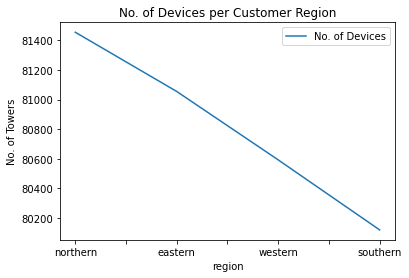

In [31]:
#PLOT 
devicesperRegion.plot(kind='line',x='province',y='No. of Devices')
plt.xlabel('region')
plt.ylabel('No. of Towers')
plt.title('No. of Devices per Customer Region')

In [32]:
#creating Towers DataFrame 
towersdf = pd.read_csv('_data/towers.csv')
towersdf.head() #preview data

,Unnamed: 0,tower_id,province,tower_type
0,0,#47560,southern,Small
1,1,Tower No : 38087,Western,Small
2,2,Tower No : 48652,Eastern,Small
3,3,Number : 29662,Southern,Large
4,4,No : 6412,Western,Medium


In [33]:
#GET SHAPE BEFORE CLEANING
towersdf.shape

(26010, 4)

In [34]:
#check for missing data
towersdfNull = towersdf[towersdf['tower_id'].isnull()] #also check province column and tower type
towersdfNull.head()
#no null values in dataframe 

,Unnamed: 0,tower_id,province,tower_type


In [35]:
#check string column consistency Filter incorrect entries 
#We notice there are inconsistent entries which need to be corrected. 
incorrectTDF = towersdf[towersdf['province'].map(len) < 7] #fillter all entries with length less than required
incorrectTDF.tail() # check head, tail and dataframe 
#towersdf=towersdf.sort_values('province',key=lambda x:x.str.len()) #sort by length. 
#towersdf.head()

,Unnamed: 0,tower_id,province,tower_type
25069,25069,22426,west,Small
25364,18307,7323,south,Large
25758,2739,No : 33896,south,Medium
25769,20539,#38756,south,Large
26000,18599,Tower No : 15175,south,Medium


In [36]:
#CLEAN towers DATAFRAME  
towersdf=towersdf.drop(['Unnamed: 0'],axis=1) #drop unwanted column
#columns to lowercase 
towersdf['province']=towersdf['province'].str.lower() 
towersdf['tower_type']=towersdf['tower_type'].str.lower()
towersdf.head()

,tower_id,province,tower_type
0,#47560,southern,small
1,Tower No : 38087,western,small
2,Tower No : 48652,eastern,small
3,Number : 29662,southern,large
4,No : 6412,western,medium


In [37]:
#correct incorrect province entries
towersdf['province'].replace("west", "western", inplace = True)
towersdf['province'].replace("north", "northern", inplace = True)
towersdf['province'].replace("south", "southern", inplace = True)
towersdf['province'].replace("east", "eastern", inplace = True)
towersdf['province'].replace(" ", "", inplace = True)
#towersdf.dropna(subset=["towerID"], axis=0, inplace=True)
towersdf.head()

,tower_id,province,tower_type
0,#47560,southern,small
1,Tower No : 38087,western,small
2,Tower No : 48652,eastern,small
3,Number : 29662,southern,large
4,No : 6412,western,medium


In [38]:
#clean Tower ID and Strip off unwanted characters 
towersCol = pd.DataFrame(towersdf['tower_id'].str.split(':|#', expand=True))
towersdf.insert(len(towersdf.columns), 'towerID', towersCol[1]) 
towersdf=towersdf.drop(['tower_id'],axis=1)
towersdf.dropna(subset=["towerID"], axis=0, inplace=True)
towersdf
towersdf.tail()

,province,tower_type,towerID
26005,western,large,19814
26006,northern,medium,27077
26007,northern,large,5585
26008,western,small,30935
26009,southern,small,46675


In [39]:
#IDENTIFY DUPLICATES on TOWER ID 
boolean = towersdf['towerID'].duplicated().any()
boolean

True

In [40]:
#Shape of Dataframe before removing duplicates 
towersdf.shape

(20824, 3)

In [41]:
#drop duplicates if any
towersdf.drop_duplicates(subset ="towerID",keep = False, inplace = True)
towersdf.head()

,province,tower_type,towerID
0,southern,small,47560
1,western,small,38087
2,eastern,small,48652
3,southern,large,29662
4,western,medium,6412


In [42]:
#GET SHAPE OF DATAFRAME after removing duplicates
towersdf.shape

(20237, 3)

In [43]:
#GROUP towers by region count 
towersRegion = towersdf.groupby('province')['towerID'].count().sort_values(ascending=False)
towersRegion = pd.DataFrame(towersRegion)
towersRegion=towersRegion.reset_index(drop=False)
towersRegion
towersRegion.style.set_caption("No. Towers Per Customer Region")

,province,towerID
0,southern,5121
1,eastern,5114
2,western,5072
3,northern,4930


In [44]:
towersRegion.describe()

,towerID
count,4.000000
mean,5059.250000
std,88.842088
min,4930.000000
25%,5036.500000
50%,5093.000000
75%,5115.750000
max,5121.000000


In [45]:
#Rename Columns 
towersRegion.rename(columns = {'towerID':'No. of Towers'}, inplace = True)
towersRegion
towersRegion.style.set_caption("Towers Per Customer Region")

,province,No. of Towers
0,southern,5121
1,eastern,5114
2,western,5072
3,northern,4930


Text(0.5, 1.0, 'Towers per Customer Region')

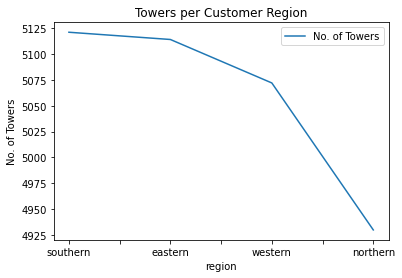

In [46]:
#PLOT 
towersRegion.plot(kind='line',x='province',y='No. of Towers')
plt.xlabel('region')
plt.ylabel('No. of Towers')
plt.title('Towers per Customer Region')

In [47]:
#creating calls data dataframe  START HERE TODO
callsdf = pd.read_csv('_data/calls.csv')
#Preview Dataset 
callsdf.head(5)

,Unnamed: 0,origin_tower,receive_tower,origin_number,receive_number,duration
0,0,13748,No : 42934,084761601,060471808,4
1,1,#13046,27633,076181836,060880521,244
2,2,#8553,#250,060889088,(27)+076233047,220
3,3,Number : 18453,No : 27671,084586338,084799255,15
4,4,20853,#4954,++27060266125,+27076922035,99


In [48]:
callsdf.shape

(54123, 6)

In [49]:
#check for null missing values
missing_data = callsdf.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
#NO missing values clean data

Unnamed: 0
False    54123
Name: Unnamed: 0, dtype: int64

origin_tower
False    54123
Name: origin_tower, dtype: int64

receive_tower
False    54123
Name: receive_tower, dtype: int64

origin_number
False    54123
Name: origin_number, dtype: int64

receive_number
False    54123
Name: receive_number, dtype: int64

duration
False    54123
Name: duration, dtype: int64



In [50]:
#clean Dataframe origin and receiving numbers
callsdf['origin_number'] = callsdf['origin_number'].str[-9:]
callsdf['receive_number'] = callsdf['receive_number'].str[-9:]
callsdf.head(5)

,Unnamed: 0,origin_tower,receive_tower,origin_number,receive_number,duration
0,0,13748,No : 42934,084761601,060471808,4
1,1,#13046,27633,076181836,060880521,244
2,2,#8553,#250,060889088,076233047,220
3,3,Number : 18453,No : 27671,084586338,084799255,15
4,4,20853,#4954,060266125,076922035,99


In [51]:
#GET THE SHAPE OF CALLS DF 
callsdf.shape

(54123, 6)

In [52]:
#clean tower columns
originCol = callsdf['origin_tower'].str.split(':|#', expand=True)
originCol

OldList = []
NewList = [] 

for number in originCol[1]:
    NewList.append(number)
for number in originCol[0]:
    OldList.append(number)
    
for i in range(len(NewList)):
     if NewList[i] == None:
        NewList[i] = OldList[i]
        
NewList = [x.strip(' ') for x in NewList]      
len(NewList)

54123

In [53]:

receiveCol = callsdf['receive_tower'].str.split(':|#', expand=True)

OldreceiveList = []
NewreceiveList = [] 

for number in receiveCol[1]:
    NewreceiveList.append(number)
for number in receiveCol[0]:
    OldreceiveList.append(number)
    
for i in range(len(NewreceiveList)):
     if NewreceiveList[i] == None:
        NewreceiveList[i] = OldreceiveList[i]
        
len(NewreceiveList)

54123

In [54]:
NewreceiveList = [x.strip(' ') for x in NewreceiveList]      
NewreceiveList
callsdf.insert(len(towersdf.columns), 'originTower', NewList)         
callsdf.insert(len(towersdf.columns), 'receiveTower', NewreceiveList) 
callsdf.head()
#callsdf.applymap(lambda x : type(x).__name__).eq({'origin_tower': 'int', 'receive_tower': 'int'})

#towersdf=towersdf.drop(['tower_id'],axis=1)
#towersdf.head()

,Unnamed: 0,origin_tower,receive_tower,receiveTower,originTower,origin_number,receive_number,duration
0,0,13748,No : 42934,42934,13748,084761601,060471808,4
1,1,#13046,27633,27633,13046,076181836,060880521,244
2,2,#8553,#250,250,8553,060889088,076233047,220
3,3,Number : 18453,No : 27671,27671,18453,084586338,084799255,15
4,4,20853,#4954,4954,20853,060266125,076922035,99


In [55]:
#DROP columns
callsdf=callsdf.drop(['origin_tower','receive_tower','Unnamed: 0'],axis=1)
callsdf.head()

,receiveTower,originTower,origin_number,receive_number,duration
0,42934,13748,084761601,060471808,4
1,27633,13046,076181836,060880521,244
2,250,8553,060889088,076233047,220
3,27671,18453,084586338,084799255,15
4,4954,20853,060266125,076922035,99


In [56]:
#check datatypes 
callsdf.dtypes

receiveTower      object
originTower       object
origin_number     object
receive_number    object
duration           int64
dtype: object

In [57]:
#create a dataframe for received calls 
receiveTowersDf= pd.DataFrame(callsdf[['receiveTower','receive_number']])
receiveTowersDf.rename(columns = {'receiveTower':'towerID'}, inplace = True)
receiveTowersDf.head()

,towerID,receive_number
0,42934,060471808
1,27633,060880521
2,250,076233047
3,27671,084799255
4,4954,076922035


In [58]:
#Received tower region 
#receiveTowersDf
receivedRegion = pd.merge(towersdf, receiveTowersDf,how="right",on="towerID")
receivedRegion['province'].replace("south", "southern", inplace = True)
#receivedRegion = pd.merge(NewTowersdf, receiveTowersDf,how="right",on="towerID")
#receiveTowersDf
receivedRegion


,province,tower_type,towerID,receive_number
0,NaN,NaN,42934,060471808
1,NaN,NaN,27633,060880521
2,eastern,large,250,076233047
3,NaN,NaN,27671,084799255
4,northern,large,4954,076922035
...,...,...,...,...
54118,NaN,NaN,35913,076914753
54119,NaN,NaN,10842,084238056
54120,southern,small,29406,084127606
54121,NaN,NaN,5838,076516267


In [59]:
receivedRegion.shape

(54123, 4)

In [60]:
#CHEC MISSING DATA
missing_data = receivedRegion.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

province
True     42836
False    11287
Name: province, dtype: int64

tower_type
True     42836
False    11287
Name: tower_type, dtype: int64

towerID
False    54123
Name: towerID, dtype: int64

receive_number
False    54123
Name: receive_number, dtype: int64



In [61]:
#DROP NAN VALUES
receivedRegion.dropna(subset=["province"], axis=0, inplace=True)
receivedRegion.shape

(11287, 4)

In [62]:
#GROUP received calls on towers by region  
newreceivedRegion = receivedRegion.groupby('province')['towerID'].count().sort_values(ascending=False)
newreceivedRegion = pd.DataFrame(newreceivedRegion)
newreceivedRegion = newreceivedRegion.reset_index(drop=False)
newreceivedRegion.rename(columns = {'towerID':'No. of Calls'}, inplace = True)
newreceivedRegion
newreceivedRegion.style.set_caption("No. Calls Received per customer  Region")

,province,No. of Calls
0,southern,2968
1,eastern,2858
2,northern,2802
3,western,2659


In [63]:
newreceivedRegion['No. of Calls'].sum()

11287

In [64]:
newreceivedRegion.describe()

,No. of Calls
count,4.000000
mean,2821.750000
std,128.557056
min,2659.000000
25%,2766.250000
50%,2830.000000
75%,2885.500000
max,2968.000000


Text(0.5, 1.0, 'Calls Received by customer Per Region')

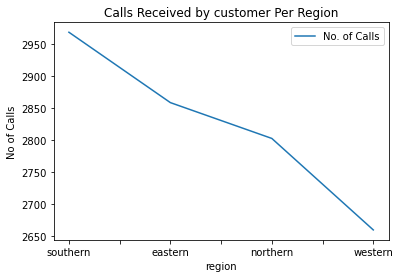

In [65]:
#PLOT 
newreceivedRegion.plot(kind='line',x='province',y='No. of Calls')
plt.xlabel('region')
plt.ylabel('No of Calls')
plt.title('Calls Received by customer Per Region')

In [66]:
#Create new DF with ORIGIN and DURATION 
#originTowerDurationDF = pd.DataFrame(callsdf[['receiveTower','originTower','duration']])
originTowerDurationDF = pd.DataFrame(callsdf[['originTower','origin_number','duration']])
originTowerDurationDF.rename(columns = {'originTower':'towerID'}, inplace = True)
originTowerDurationDF.head()

,towerID,origin_number,duration
0,13748,084761601,4
1,13046,076181836,244
2,8553,060889088,220
3,18453,084586338,15
4,20853,060266125,99


In [67]:
originTowerDurationDF.shape

(54123, 3)

In [68]:
towersdf.shape

(20237, 3)

In [69]:
originRegion = pd.merge(towersdf, originTowerDurationDF,how="right",on="towerID")
originRegion.dropna(subset=["province"], axis=0, inplace=True)
originRegion.head()

#receivedRegion = pd.merge(NewTowersdf, receiveTowersDf,how="right",on="towerID")
#receiveTowersDf
#originRegionb=pd.DataFrame(originRegion.dropna(subset=["province"], axis=0, inplace=True))

#originRegionb.shape
#print("originTowersDfb:",originTowersDfb.shape,"NewTowersdf:",NewTowersdf.shape,"originRegion:",originRegionb.shape)

,province,tower_type,towerID,origin_number,duration
1,southern,small,13046,076181836,244
2,eastern,medium,8553,060889088,220
10,eastern,large,46235,084948265,282
12,western,small,24757,060217196,51
16,northern,large,15783,060119894,43


In [70]:
#CHECK IF THERE IS MISSING DATA 
missing_data = originRegion.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

province
False    11347
Name: province, dtype: int64

tower_type
False    11347
Name: tower_type, dtype: int64

towerID
False    11347
Name: towerID, dtype: int64

origin_number
False    11347
Name: origin_number, dtype: int64

duration
False    11347
Name: duration, dtype: int64



In [71]:
#Check shape of merged DF and original DFs 
print("Towers DF")
print(towersdf.shape)
print("Merged")
print(originRegion.shape)

Towers DF
(20237, 3)
Merged
(11347, 5)


In [72]:
neworiginRegion = originRegion.groupby('province')['towerID'].count().sort_values(ascending=False)
neworiginRegion = pd.DataFrame(neworiginRegion)
neworiginRegion = neworiginRegion.reset_index(drop=False)
neworiginRegion.rename(columns = {'towerID':'No. of Calls'}, inplace = True)
neworiginRegion
neworiginRegion.style.set_caption("No. Calls Made  Per Customer Region")

,province,No. of Calls
0,southern,2928
1,eastern,2854
2,northern,2809
3,western,2756


In [73]:
neworiginRegion['No. of Calls'].sum()

11347

In [74]:
neworiginRegion.describe()

,No. of Calls
count,4.000000
mean,2836.750000
std,72.834859
min,2756.000000
25%,2795.750000
50%,2831.500000
75%,2872.500000
max,2928.000000


Text(0.5, 1.0, 'Calls Made by customer Per Region')

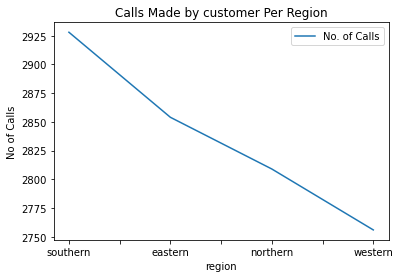

In [75]:
#PLOT
neworiginRegion.plot(kind='line',x='province',y='No. of Calls')
plt.xlabel('region')
plt.ylabel('No of Calls')
plt.title('Calls Made by customer Per Region')


In [76]:
#REVENUE CALCULATONS START HERE
callsdf.head()

,receiveTower,originTower,origin_number,receive_number,duration
0,42934,13748,084761601,060471808,4
1,27633,13046,076181836,060880521,244
2,250,8553,060889088,076233047,220
3,27671,18453,084586338,084799255,15
4,4954,20853,060266125,076922035,99


In [77]:
#TO GER REVENUE PER REGION include customer type modified calls DF
#Merge devices df with calls df on phone number 
#Merge df with customers df on ID number

devicesDFtemp = devicesDf
devicesDFtemp.rename(columns = {'phone_number':'origin_number'}, inplace = True)
devicesDFtemp.head()

,origin_number,id_number
0,060763452,5696488171026936992
1,076213135,2271534724055555740
2,060902023,4061016857322945647
3,060861303,3689422492649774483
4,060261227,8806703912494684682


In [78]:
devicesDFtemp['id_number']=devicesDFtemp['id_number'].astype('object')#['owner']=devicesDFtemp['owner'].astype('object')
devicesDFtemp.head()

,origin_number,id_number
0,060763452,5696488171026936992
1,076213135,2271534724055555740
2,060902023,4061016857322945647
3,060861303,3689422492649774483
4,060261227,8806703912494684682


In [79]:
# CREATE NEW DF modified calls with ownwer ID
originRegionRevenue = pd.merge(devicesDFtemp, originRegion, how="right",on="origin_number")
#originRegionRevenue.dropna(subset=["owner"], axis=0, inplace=True)
originRegionRevenue['id_number']=originRegionRevenue['id_number'].astype('object')
#originRegionRevenue.rename(columns = {'owner':'id_number'}, inplace = True)
originRegionRevenue.head()


,origin_number,id_number,province,tower_type,towerID,duration
0,076181836,1442855595330478556,southern,small,13046,244
1,060889088,1646885028984376068,eastern,medium,8553,220
2,084948265,2031606110321692769,eastern,large,46235,282
3,060217196,7941019636232107732,western,small,24757,51
4,060119894,5334189445234659507,northern,large,15783,43


In [80]:
#CHECK missing data
missing_data = originRegionRevenue.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

origin_number
False    11347
Name: origin_number, dtype: int64

id_number
False    11280
True        67
Name: id_number, dtype: int64

province
False    11347
Name: province, dtype: int64

tower_type
False    11347
Name: tower_type, dtype: int64

towerID
False    11347
Name: towerID, dtype: int64

duration
False    11347
Name: duration, dtype: int64



In [81]:
#DROP NULL ROWS
originRegionRevenue.dropna(subset=["id_number"], axis=0, inplace=True)

In [82]:
customersdf.head()

,id_number,province,customer_type
0,3816952758161034129,eastern,normal
129336,370380942793283140,western,normal
129337,4350385051407530737,western,vip
129338,8806539073855002419,western,basic
129339,6769496816752039155,eastern,vip


In [83]:
#create a temporary subset of customer df dataframe
customersdftemp = customersdf[['id_number','customer_type']]
#customersdftemp.rename(columns = {'id_number':'owner'}, inplace = True)
customersdftemp.shape

(232554, 2)

In [84]:
customersdftemp['id_number']=customersdftemp['id_number'].astype('object')
customersdftemp.head()

/var/folders/kc/yjtwbjdn4yjf5gwd50xqj26c0000gn/T/ipykernel_9442/2551683363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customersdftemp['id_number']=customersdftemp['id_number'].astype('object')


,id_number,customer_type
0,3816952758161034129,normal
129336,370380942793283140,normal
129337,4350385051407530737,vip
129338,8806539073855002419,basic
129339,6769496816752039155,vip


In [85]:
print(customersdftemp['id_number'].dtypes)
print(originRegionRevenue['id_number'].dtypes)

object
object


In [86]:
# CREATE NEW DF modified calls with ownwer ID
newRevenueDF = pd.merge(customersdftemp, originRegionRevenue, how="right",on="id_number")
#newRevenueDF['owner']=newRevenueDF['owner'].astype('object')
#modifiedcallsdf['owner']=modifiedcallsdf['owner'].astype('int')
#revenuebyRegionOG.rename(columns = {'province':'ogprovince'}, inplace = True)
#newRevenueDF.tail()
print(newRevenueDF['id_number'].dtypes)
newRevenueDF.head()

object


,id_number,customer_type,origin_number,province,tower_type,towerID,duration
0,1442855595330478592.0,normal,076181836,southern,small,13046,244
1,1646885028984376064.0,basic,060889088,eastern,medium,8553,220
2,2031606110321692672.0,normal,084948265,eastern,large,46235,282
3,7941019636232108032.0,vip,060217196,western,small,24757,51
4,5334189445234659328.0,basic,060119894,northern,large,15783,43


In [87]:
#check missing data
missing_data = newRevenueDF.isnull()
missing_data.tail()
newRevenueDF.dropna(subset=["customer_type"], axis=0, inplace=True)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

id_number
False    11280
Name: id_number, dtype: int64

customer_type
False    11278
True         2
Name: customer_type, dtype: int64

origin_number
False    11280
Name: origin_number, dtype: int64

province
False    11280
Name: province, dtype: int64

tower_type
False    11280
Name: tower_type, dtype: int64

towerID
False    11280
Name: towerID, dtype: int64

duration
False    11280
Name: duration, dtype: int64



In [88]:
#check maximum duration
print("Max Duration",newRevenueDF['duration'].max())
print("Shape:",newRevenueDF.shape)
#max duration is less than 300 minutes 

Max Duration 299
Shape: (11278, 7)


In [89]:
devicesDFtemp.head(2)

,origin_number,id_number
0,060763452,5696488171026936992
1,076213135,2271534724055555740


In [90]:
callsdf.head(2)

,receiveTower,originTower,origin_number,receive_number,duration
0,42934,13748,084761601,060471808,4
1,27633,13046,076181836,060880521,244


In [91]:
#CALC REVENUE MERGE CALLS DF
newRevenueDFb = pd.merge(callsdf[['origin_number','receive_number','receiveTower']], newRevenueDF, how="right",on="origin_number")
#newRevenueDF['owner']=newRevenueDF['owner'].astype('object')
newRevenueDFb.dropna(subset=["province"], axis=0, inplace=True)
#modifiedcallsdf['owner']=modifiedcallsdf['owner'].astype('int')
newRevenueDFb.rename(columns = {'province':'ogprovince','id_number':'ogid_number','customer_type':'ogcustomer_type'}, inplace = True)
#newRevenueDF.tail()
#print(newRevenueDF['id_number'].dtypes)
print("Shape",newRevenueDFb.shape)
newRevenueDFb.head()


Shape (13233, 9)


,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration
0,076181836,060880521,27633,1442855595330478592.0,normal,southern,small,13046,244
1,060889088,076233047,250,1646885028984376064.0,basic,eastern,medium,8553,220
2,084948265,060343298,2994,2031606110321692672.0,normal,eastern,large,46235,282
3,060217196,084274033,29124,7941019636232108032.0,vip,western,small,24757,51
4,060119894,060942973,41293,5334189445234659328.0,basic,northern,large,15783,43


In [92]:
#CHECK MISSING VALUES 
missing_data = newRevenueDFb.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

origin_number
False    13233
Name: origin_number, dtype: int64

receive_number
False    13233
Name: receive_number, dtype: int64

receiveTower
False    13233
Name: receiveTower, dtype: int64

ogid_number
False    13233
Name: ogid_number, dtype: int64

ogcustomer_type
False    13233
Name: ogcustomer_type, dtype: int64

ogprovince
False    13233
Name: ogprovince, dtype: int64

tower_type
False    13233
Name: tower_type, dtype: int64

towerID
False    13233
Name: towerID, dtype: int64

duration
False    13233
Name: duration, dtype: int64



In [93]:
devicesDFtempb = devicesDFtemp
devicesDFtempb.rename(columns = {'origin_number':'receive_number','id_number':'rcid_number'}, inplace = True)
devicesDFtempb.head()

,receive_number,rcid_number
0,060763452,5696488171026936992
1,076213135,2271534724055555740
2,060902023,4061016857322945647
3,060861303,3689422492649774483
4,060261227,8806703912494684682


In [94]:
newRevenueDFc = pd.merge(newRevenueDFb, devicesDFtempb, how="left",on="receive_number")
#newRevenueDF['owner']=newRevenueDF['owner'].astype('object')
newRevenueDFc.dropna(subset=["rcid_number"], axis=0, inplace=True)
newRevenueDFc.tail()

#modifiedcallsdf['owner']=modifiedcallsdf['owner'].astype('int')
#newRevenueDFc.rename(columns = {'province':'ogprovince','id_number':'ogid_number','customer_type':'ogcustomer_type'}, inplace = True)
#newRevenueDF.tail()
#print(newRevenueDF['id_number'].dtypes)

,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number
13228,060434036,084689915,14530,5684408787691571200.0,basic,eastern,small,34321,20,1186585111391890456
13229,060633680,060415766,39709,1033522325599114368.0,normal,eastern,small,34538,151,512582906683357027
13230,076719811,084734025,23089,1231970956136560640.0,vip,western,large,40056,35,2023390840854051956
13231,076478765,076459253,10143,7510355026957051904.0,normal,southern,medium,4100,242,8886221372145220153
13232,060824648,060988547,40457,2963237627062505984.0,normal,southern,medium,41819,290,3410488861210973510


In [95]:
newRevenueDFc.shape

(13164, 10)

In [96]:
#check MISSING VELUES 
missing_data = newRevenueDFc.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
   # print("")   

origin_number
False    13164
Name: origin_number, dtype: int64
receive_number
False    13164
Name: receive_number, dtype: int64
receiveTower
False    13164
Name: receiveTower, dtype: int64
ogid_number
False    13164
Name: ogid_number, dtype: int64
ogcustomer_type
False    13164
Name: ogcustomer_type, dtype: int64
ogprovince
False    13164
Name: ogprovince, dtype: int64
tower_type
False    13164
Name: tower_type, dtype: int64
towerID
False    13164
Name: towerID, dtype: int64
duration
False    13164
Name: duration, dtype: int64
rcid_number
False    13164
Name: rcid_number, dtype: int64


In [97]:
customersdftemp.head()

,id_number,customer_type
0,3816952758161034129,normal
129336,370380942793283140,normal
129337,4350385051407530737,vip
129338,8806539073855002419,basic
129339,6769496816752039155,vip


In [98]:
customersdftemp.rename(columns = {'id_number':'rcid_number','customer_type':'rccustomer_type'}, inplace = True)
customersdftemp.head(2)

/Users/hellofuture/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,rcid_number,rccustomer_type
0,3816952758161034129,normal
129336,370380942793283140,normal


In [99]:
#CREATE A DATAFRAME WITH CUSTOMER TYPES and durations 
newRevenueDFd = pd.merge(newRevenueDFc, customersdftemp, how="left",on="rcid_number")
#newRevenueDF['owner']=newRevenueDF['owner'].astype('object')
newRevenueDFd.dropna(subset=["rccustomer_type","ogcustomer_type","rccustomer_type"], axis=0, inplace=True)
newRevenueDFd = newRevenueDFd.reset_index(drop=True)
print(newRevenueDFd.shape)
newRevenueDFd.tail()

(13163, 11)


,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number,rccustomer_type
13158,060434036,084689915,14530,5684408787691571200.0,basic,eastern,small,34321,20,1186585111391890456,basic
13159,060633680,060415766,39709,1033522325599114368.0,normal,eastern,small,34538,151,512582906683357027,normal
13160,076719811,084734025,23089,1231970956136560640.0,vip,western,large,40056,35,2023390840854051956,basic
13161,076478765,076459253,10143,7510355026957051904.0,normal,southern,medium,4100,242,8886221372145220153,normal
13162,060824648,060988547,40457,2963237627062505984.0,normal,southern,medium,41819,290,3410488861210973510,vip


In [100]:
#check MISSING VELUES 
missing_data = newRevenueDFd.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
   # print("")  

origin_number
False    13163
Name: origin_number, dtype: int64
receive_number
False    13163
Name: receive_number, dtype: int64
receiveTower
False    13163
Name: receiveTower, dtype: int64
ogid_number
False    13163
Name: ogid_number, dtype: int64
ogcustomer_type
False    13163
Name: ogcustomer_type, dtype: int64
ogprovince
False    13163
Name: ogprovince, dtype: int64
tower_type
False    13163
Name: tower_type, dtype: int64
towerID
False    13163
Name: towerID, dtype: int64
duration
False    13163
Name: duration, dtype: int64
rcid_number
False    13163
Name: rcid_number, dtype: int64
rccustomer_type
False    13163
Name: rccustomer_type, dtype: int64


In [101]:
#CALCULATE CALL COSTS AND CREATE REVENUE COLUMN  START HERE 
#ADD BASE CHARGE create a lst
baseCharges=[] 

#clean tower column
originCustomerType = newRevenueDFd['ogcustomer_type'] #

callType = []

for call in newRevenueDFd['ogcustomer_type']:
    #callType.append(call)
        call = call 
        if call == 'normal':
            basecharge=200
            baseCharges.append(basecharge)
        elif call== 'vip':
            basecharge=500
            baseCharges.append(basecharge)
        elif call == 'basic':
            basecharge=0
            baseCharges.append(basecharge)
    
#print(baseCharges)
baseChargesColumn=pd.DataFrame(baseCharges)
print(baseChargesColumn.shape)
baseChargesColumn.rename(columns= {0:'baseCharge'}, inplace = True)
baseChargesColumn.head()

(13163, 1)


,baseCharge
0,200
1,0
2,200
3,500
4,0


In [102]:
#add base charges to Dataframe 
newRevenueDFd['basecharge']=baseChargesColumn['baseCharge']
newRevenueDFd.tail()

,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number,rccustomer_type,basecharge
13158,060434036,084689915,14530,5684408787691571200.0,basic,eastern,small,34321,20,1186585111391890456,basic,0
13159,060633680,060415766,39709,1033522325599114368.0,normal,eastern,small,34538,151,512582906683357027,normal,200
13160,076719811,084734025,23089,1231970956136560640.0,vip,western,large,40056,35,2023390840854051956,basic,500
13161,076478765,076459253,10143,7510355026957051904.0,normal,southern,medium,4100,242,8886221372145220153,normal,200
13162,060824648,060988547,40457,2963237627062505984.0,normal,southern,medium,41819,290,3410488861210973510,vip,200


In [103]:
#add call cost column 
#weght columns and use numbers 

callTypesog=[] 

callTypesrc = []

callCost=[]

calltypenum=[]

length = len(callTypesog)

for call in newRevenueDFd['ogcustomer_type']:
    #callType.append(call)
          callTypesog.append(call)

for call in newRevenueDFd['rccustomer_type']:
    #callType.append(call)
        callTypesrc.append(call)

for i in range(len(callTypesog)):
    if callTypesog[i] =="vip":
        receiver=callTypesrc[i]
        if receiver == "basic":
            cost= 0.05
            callCost.append(cost)
        elif receiver== "normal":
            cost= 0.05
            callCost.append(cost)
        elif receiver == "vip":
            cost= 0
            callCost.append(cost)
    elif callTypesog[i] == "normal":
        receiver=callTypesrc[i]
        if receiver == "basic":
            cost= 0.15
            callCost.append(cost)
        elif receiver == "normal":
            cost= 0.15
            callCost.append(cost)
        elif receiver == "vip":
            cost= 0.15
            callCost.append(cost)
      
    elif callTypesog[i] == "basic":
        receiver=callTypesrc[i]
        if receiver == "basic":
            cost= 0.30
            callCost.append(cost)
        elif receiver=="normal":
            cost= 0.30
            callCost.append(cost)
        elif receiver == "vip":
            cost= 0.30
            callCost.append(cost)

callCostDF=pd.DataFrame(callCost)
print(callCostDF.shape)
callCostDF.rename(columns= {0:'cost'}, inplace = True)
callCostDF.head()

(13163, 1)


,cost
0,0.15
1,0.30
2,0.15
3,0.05
4,0.30


In [104]:
# add cost to dataframe and 
newRevenueDFd['cost']= callCostDF['cost']
newRevenueDFd['callcharge']= (newRevenueDFd['cost']*newRevenueDFd['duration'])+ newRevenueDFd['basecharge']

newRevenueDFd.tail()
#.drop('rccustomer_typenum',axis='columns',inplace=True) 

,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number,rccustomer_type,basecharge,cost,callcharge
13158,060434036,084689915,14530,5684408787691571200.0,basic,eastern,small,34321,20,1186585111391890456,basic,0,0.30,6.00
13159,060633680,060415766,39709,1033522325599114368.0,normal,eastern,small,34538,151,512582906683357027,normal,200,0.15,222.65
13160,076719811,084734025,23089,1231970956136560640.0,vip,western,large,40056,35,2023390840854051956,basic,500,0.05,501.75
13161,076478765,076459253,10143,7510355026957051904.0,normal,southern,medium,4100,242,8886221372145220153,normal,200,0.15,236.30
13162,060824648,060988547,40457,2963237627062505984.0,normal,southern,medium,41819,290,3410488861210973510,vip,200,0.15,243.50


In [105]:
customersdftempb= customersdf
customersdftempb.rename(columns = {'id_number':'rcid_number','province':'rc_province'}, inplace = True)
customersdftempb.head() 

print("OG SHAPE: ",newRevenueDFd.shape)

newRevenueDFd = pd.merge(newRevenueDFd, customersdftempb,on="rcid_number")
#originRegion.dropna(subset=["province"], axis=0, inplace=True)
print("NEW SHAPE: ",newRevenueDFd.shape)

newRevenueDFd.head()

#neworiginRegi

OG SHAPE:  (13163, 14)
NEW SHAPE:  (13163, 16)


,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number,rccustomer_type,basecharge,cost,callcharge,rc_province,customer_type
0,076181836,060880521,27633,1442855595330478592.0,normal,southern,small,13046,244,1084289706531117267,vip,200,0.15,236.60,western,vip
1,060889088,076233047,250,1646885028984376064.0,basic,eastern,medium,8553,220,5794251075045454828,vip,0,0.30,66.00,eastern,vip
2,084948265,060343298,2994,2031606110321692672.0,normal,eastern,large,46235,282,8414052064930695255,vip,200,0.15,242.30,southern,vip
3,060217196,084274033,29124,7941019636232108032.0,vip,western,small,24757,51,939818796033679505,normal,500,0.05,502.55,eastern,normal
4,060119894,060942973,41293,5334189445234659328.0,basic,northern,large,15783,43,753335086479171851,normal,0,0.30,12.90,western,normal


In [106]:
#check mssing values

missing_data = newRevenueDFb.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

origin_number
False    13233
Name: origin_number, dtype: int64

receive_number
False    13233
Name: receive_number, dtype: int64

receiveTower
False    13233
Name: receiveTower, dtype: int64

ogid_number
False    13233
Name: ogid_number, dtype: int64

ogcustomer_type
False    13233
Name: ogcustomer_type, dtype: int64

ogprovince
False    13233
Name: ogprovince, dtype: int64

tower_type
False    13233
Name: tower_type, dtype: int64

towerID
False    13233
Name: towerID, dtype: int64

duration
False    13233
Name: duration, dtype: int64



In [107]:
# OVERVIEW Revenue per customer region 
revenueperRegion = newRevenueDFd.groupby('ogprovince')['callcharge'].sum() 
revenueperRegion = pd.DataFrame(revenueperRegion)
revenueperRegion = revenueperRegion.reset_index(drop=False)
revenueperRegion.rename(columns = {'ogprovince':'Province','callcharge':'revenue (ZAR)'}, inplace = True)
#neworiginRegion
print(revenueperRegion.shape)
revenueperRegion.head()
revenueperRegion.style.set_caption("Revenue per  customer  Region")


(4, 2)


,Province,revenue (ZAR)
0,eastern,856447.050000
1,northern,823013.850000
2,southern,884939.250000
3,western,826771.650000


Text(0.5, 1.0, 'Revenue by Customer Region')

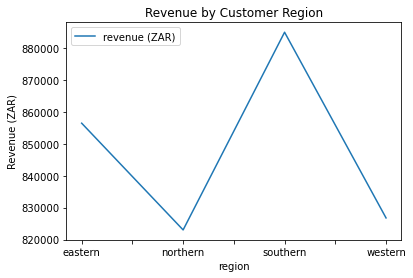

In [108]:
#PLOT
revenueperRegion.plot(kind='line',x='Province',y='revenue (ZAR)')
plt.xlabel('region')
plt.ylabel('Revenue (ZAR)')
plt.title('Revenue by Customer Region')

In [109]:
#-	No. of Calls per customer (from/to) DONE 
callsperCustomerDF= newRevenueDFd.groupby('ogid_number')['ogid_number'].count().sort_values(ascending=False)
callsperCustomerDF = pd.DataFrame(callsperCustomerDF)
callsperCustomerDF.rename(columns = {'ogid_number':'No. Calls'}, inplace = True)
callsperCustomerDF = callsperCustomerDF.reset_index(drop=False)
callsperCustomerDF.rename(columns = {'ogid_number':'id_number'}, inplace = True)
callsperCustomerDF['id_number'] = callsperCustomerDF['id_number'].astype('int')
callsperCustomerDF.head().style.set_caption("No. of Calls per customer (from)")
#callsperCustomerDF.describe()

,id_number,No. Calls
0,2843041397255511040,15
1,7038057845663781888,9
2,3327204942990188544,9
3,6970038069489765376,8
4,4686426067235026944,8


In [110]:
callsperCustomerDF.describe()

,id_number,No. Calls
count,1.076000e+04,10760.000000
mean,4.580484e+18,1.223327
std,2.659840e+18,0.615228
min,3.398107e+15,1.000000
25%,2.288246e+18,1.000000
50%,4.564837e+18,1.000000
75%,6.869238e+18,1.000000
max,9.221964e+18,15.000000


In [111]:
#see customer types 
newRevenueDFd.loc[ newRevenueDFd['ogid_number']==2843041397255511040]

,origin_number,receive_number,receiveTower,ogid_number,ogcustomer_type,ogprovince,tower_type,towerID,duration,rcid_number,rccustomer_type,basecharge,cost,callcharge,rc_province,customer_type
4707,084550781,084469527,40558,2843041397255511040.0,vip,western,medium,11836,14,4513750456926091284,normal,500,0.05,500.70,southern,normal
4708,084550781,084469527,40558,2843041397255511040.0,vip,southern,medium,3391,295,4513750456926091284,normal,500,0.05,514.75,southern,normal
4709,084550781,084469527,40558,2843041397255511040.0,vip,southern,medium,20226,256,4513750456926091284,normal,500,0.05,512.80,southern,normal
4710,084550781,060552598,10482,2843041397255511040.0,vip,western,medium,11836,14,6962083452012625926,normal,500,0.05,500.70,western,normal
4711,084550781,060552598,10482,2843041397255511040.0,vip,southern,medium,3391,295,6962083452012625926,normal,500,0.05,514.75,western,normal
4712,084550781,060552598,10482,2843041397255511040.0,vip,southern,medium,20226,256,6962083452012625926,normal,500,0.05,512.80,western,normal
4713,084550781,076780816,39239,2843041397255511040.0,vip,western,medium,11836,14,6312564203671136426,vip,500,0.00,500.00,southern,vip
4714,084550781,076780816,39239,2843041397255511040.0,vip,southern,medium,3391,295,6312564203671136426,vip,500,0.00,500.00,southern,vip
4715,084550781,076780816,39239,2843041397255511040.0,vip,southern,medium,20226,256,6312564203671136426,vip,500,0.00,500.00,southern,vip
4716,084550781,084279196,6719,2843041397255511040.0,vip,western,medium,11836,14,4635217740470595474,vip,500,0.00,500.00,western,vip


In [112]:
newRevenueDFd.describe()

,duration,basecharge,cost,callcharge
count,13163.000000,13163.000000,13163.000000,13163.000000
mean,149.228064,233.510598,0.160951,257.629097
std,87.928266,205.076967,0.109678,189.738365
min,-292.000000,0.000000,0.000000,-75.600000
25%,74.000000,0.000000,0.050000,68.400000
50%,149.000000,200.000000,0.150000,222.500000
75%,226.000000,500.000000,0.300000,500.000000
max,299.000000,500.000000,0.300000,514.950000


In [113]:
#	No. of Regions called per customer (from/to) DONE
regionscalledPC= newRevenueDFd.groupby('ogid_number')['rc_province'].count().sort_values(ascending=False)
regionscalledPC = pd.DataFrame(regionscalledPC)
#regionscalledPC.rename(columns = {'ogid_number':'No. Calls'}, inplace = True)
regionscalledPC = regionscalledPC.reset_index(drop=False)
regionscalledPC.rename(columns = {'rc_province':'Regions Called','ogid_number':'id_number'}, inplace = True)
regionscalledPC['id_number'] = regionscalledPC['id_number'].astype('int')
regionscalledPC.head().style.set_caption("No. Regions called per customer")


,id_number,Regions Called
0,2843041397255511040,15
1,7038057845663781888,9
2,3327204942990188544,9
3,6970038069489765376,8
4,4686426067235026944,8


In [114]:
regionscalledPC['Regions Called'].describe()

count    10760.000000
mean         1.223327
std          0.615228
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: Regions Called, dtype: float64

In [115]:
#	No. of Towers called per customer (from/to)
TowersFromPC= newRevenueDFd.groupby('ogid_number')['receiveTower'].count().sort_values(ascending=False)
TowersFromPC = pd.DataFrame(TowersFromPC)
#regionscalledPC.rename(columns = {'ogid_number':'No. Calls'}, inplace = True)
TowersFromPC = TowersFromPC.reset_index(drop=False)
TowersFromPC.rename(columns = {'ogid_number':'id_number','towerD':'No of Towers'}, inplace = True)
TowersFromPC['id_number'] = regionscalledPC['id_number'].astype('int')
TowersFromPC.head().style.set_caption("No. Towers called per customer")


,id_number,receiveTower
0,2843041397255511040,15
1,7038057845663781888,9
2,3327204942990188544,9
3,6970038069489765376,8
4,4686426067235026944,8


In [116]:
TowersFromPC['receiveTower'].sum()

13163

In [117]:
#-	Total Revenue per customer DONE
totalRevenuePC= newRevenueDFd.groupby('ogid_number')['callcharge'].sum().sort_values(ascending=False)
totalRevenuePC = pd.DataFrame(totalRevenuePC)
#regionscalledPC.rename(columns = {'ogid_number':'No. Calls'}, inplace = True)
totalRevenuePC = totalRevenuePC.reset_index(drop=False)
totalRevenuePC.rename(columns = {'ogid_number':'id_number','callcharge':'Revenue'}, inplace = True)
totalRevenuePC['id_number'] = regionscalledPC['id_number'].astype('int')
totalRevenuePC['Revenue'] = totalRevenuePC['Revenue'].abs()
totalRevenuePC.head().style.set_caption("Total Revenue per customer")

,id_number,Revenue
0,2843041397255511040,7584.750000
1,7038057845663781888,4016.800000
2,3327204942990188544,3074.700000
3,6970038069489765376,3035.900000
4,4686426067235026944,3033.900000


In [118]:
totalRevenuePC['Revenue'].sum()

3391770.6

In [119]:
totalRevenuePC['Revenue'].describe()

count    10760.000000
mean       315.220316
std        309.777097
min          0.300000
25%         75.900000
50%        227.600000
75%        500.000000
max       7584.750000
Name: Revenue, dtype: float64